In [1]:
import torch as th
import numpy as np

In [2]:
tensor_a = th.tensor([1,2,3,4])
tensor_b = th.tensor([5,6,7,8])

In [3]:
print(tensor_a + tensor_b)
print(tensor_a.add(tensor_b))
print(th.add(tensor_a, tensor_b))

tensor([ 6,  8, 10, 12])
tensor([ 6,  8, 10, 12])
tensor([ 6,  8, 10, 12])


In [4]:
tensor_b - tensor_a

tensor([4, 4, 4, 4])

In [5]:
tensor_a * tensor_b

tensor([ 5, 12, 21, 32])

In [6]:
tensor_b / tensor_a

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [7]:
tensor_b % tensor_a

tensor([0, 0, 1, 0])

In [8]:
th.pow(tensor_a, tensor_b)

tensor([    1,    64,  2187, 65536])

In [9]:
tensor_a.add(tensor_b)

tensor([ 6,  8, 10, 12])

In [10]:
tensor_a

tensor([1, 2, 3, 4])

In [11]:
tensor_a.add_(tensor_b)

tensor([ 6,  8, 10, 12])

In [12]:
tensor_a

tensor([ 6,  8, 10, 12])

# Create a Simple Neural Network

In [13]:
import torch as th
import torch.nn as nn
import torch.nn.functional as F

In [14]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc1 = nn.Linear(in_features, 16)
        self.fc2 = nn.Linear(16,8)
        self.out = nn.Linear(8,out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [15]:
# pick a manual seed for randomization
th.manual_seed(42)
model = Model(4, 3)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
path = r"C:/Users/Lenovo\Downloads/ML datasets/iris.csv"
df = pd.read_csv(path)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [18]:
df.variety = df['variety'].replace('Setosa', 0)
df.variety = df['variety'].replace('Versicolor', 1)
df.variety = df['variety'].replace('Virginica', 2)
df.tail()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11700\1879522224.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.variety = df['variety'].replace('Virginica', 2)


,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [19]:
X = df.drop('variety', axis='columns')
y = df.variety

In [20]:
# convert numpy arrays 
X = X.values
y = y.values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train = th.FloatTensor(X_train)
X_test = th.FloatTensor(X_test)

In [23]:
y_train = th.LongTensor(y_train)
y_test = th.LongTensor(y_test)

In [24]:
criterian = nn.CrossEntropyLoss()
optimizer = th.optim.Adam(model.parameters(), lr= 0.01)

In [25]:
epochs = 200
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterian(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    if i % 10 == 0:
        print(f'Epoch: {i} loss: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 loss: 1.02701997756958
Epoch: 10 loss: 0.6968629956245422
Epoch: 20 loss: 0.47576501965522766
Epoch: 30 loss: 0.40170925855636597
Epoch: 40 loss: 0.29994285106658936
Epoch: 50 loss: 0.17390652000904083
Epoch: 60 loss: 0.09631326794624329
Epoch: 70 loss: 0.061467934399843216
Epoch: 80 loss: 0.04714696854352951
Epoch: 90 loss: 0.04038296267390251
Epoch: 100 loss: 0.03663245216012001
Epoch: 110 loss: 0.034225497394800186
Epoch: 120 loss: 0.03251265734434128
Epoch: 130 loss: 0.03120299056172371
Epoch: 140 loss: 0.030149254947900772
Epoch: 150 loss: 0.02926737628877163
Epoch: 160 loss: 0.02851514331996441
Epoch: 170 loss: 0.02786080725491047
Epoch: 180 loss: 0.02727922797203064
Epoch: 190 loss: 0.02675854228436947


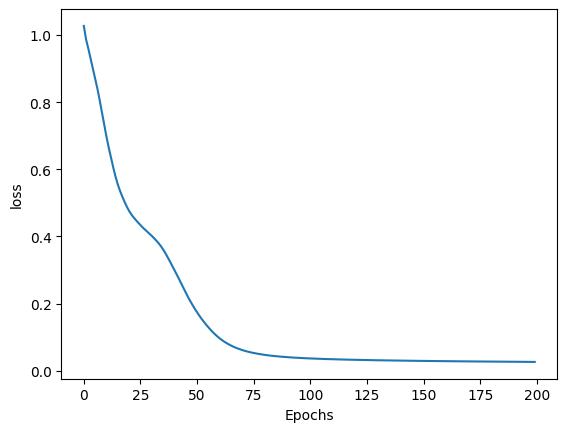

In [26]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [27]:
with th.no_grad():
    y_eval = model.forward(X_test)
    loss = criterian(y_eval, y_test)
    
loss

tensor(0.1634)

In [28]:
correct = 0
prediction = []
with th.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        # Will tell us what type of flower class our network thinks it is
        print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
        prediction.append(y_val.argmax().item())

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-1.7017,  6.4226, -2.3589]) 	 1 	 1
2.)  tensor([-10.0499,   4.7810,   9.0568]) 	 1 	 2
3.)  tensor([-14.6966,   4.0120,  14.9909]) 	 2 	 2
4.)  tensor([-1.3696,  6.2814, -2.7554]) 	 1 	 1
5.)  tensor([-16.2245,   4.1842,  16.6589]) 	 2 	 2
6.)  tensor([-4.3095,  7.2807,  0.6665]) 	 1 	 1
7.)  tensor([-1.8752,  6.3924, -2.0640]) 	 1 	 1
8.)  tensor([ 11.0567,   2.0599, -18.4906]) 	 0 	 0
9.)  tensor([ 0.9029,  4.9557, -5.1652]) 	 1 	 1
10.)  tensor([-4.4558,  6.7903,  1.1704]) 	 1 	 1
11.)  tensor([-11.0751,   4.8853,  10.1730]) 	 2 	 2
12.)  tensor([-10.4386,   4.5980,   9.6339]) 	 2 	 2
13.)  tensor([ 11.5715,   2.1323, -19.3515]) 	 0 	 0
14.)  tensor([-7.0320,  6.5562,  4.3384]) 	 1 	 1
15.)  tensor([-9.4600,  5.1955,  8.0719]) 	 2 	 2
16.)  tensor([  9.2814,   1.9478, -15.6381]) 	 0 	 0
17.)  tensor([-7.0895,  5.8154,  4.8758]) 	 1 	 1
18.)  tensor([-21.7479,   1.8763,  24.0750]) 	 2 	 2
19.)  tensor([ 10.3552,   1.9611, -17.3175]) 	 0 	 0
20.)  tensor([  9.6391,   1.8

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)
cm

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]], dtype=int64)

In [30]:
new_iris = th.tensor([4.7, 3.2, 1.3, 0.2])

In [31]:
with th.no_grad():
    y_new = (model.forward(new_iris))
    print(y_new)

tensor([  9.6391,   1.8603, -16.1199])


In [32]:
y_new.argmax()

tensor(0)

In [33]:
index = y_new.argmax().item()

In [34]:
targets = ['Setosa', 'Versicolor','Virginica']

print(targets[index])

Setosa


In [35]:
th.save(model.state_dict(), 'iris_model.pt')

In [38]:
new_model = Model(4,3)
new_model.load_state_dict(th.load('iris_model.pt'))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11700\810857824.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(th.load('iris_model.pt'))


<All keys matched successfully>

In [39]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional layer
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(16, 16, 1)))

# Max-pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected dense layer
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,595 (197.64 KB)

 Trainable params: 50,595 (197.64 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Define the model
model = Sequential()

# Convolutional layer
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(16, 16, 3)))

# Max-pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected dense layer
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,794 (151.54 KB)

 Trainable params: 38,794 (151.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
def regular_conv_ops(image_size, in_channels, out_channels, kernel_size, num_images):
    output_size = image_size - kernel_size + 1
    ops_per_pixel = kernel_size ** 2 * in_channels
    total_ops = ops_per_pixel * output_size ** 2 * out_channels * num_images
    return total_ops

def depthwise_separable_conv_ops(image_size, in_channels, out_channels, kernel_size, num_images):
    output_size = image_size - kernel_size + 1
    depthwise_ops = kernel_size ** 2 * in_channels * output_size ** 2
    pointwise_ops = output_size ** 2 * in_channels * out_channels
    total_ops = (depthwise_ops + pointwise_ops) * num_images
    return total_ops

# Given parameters
image_size = 12
in_channels = 3  # RGB
out_channels = 32
kernel_size = 3
num_images = 100

# Calculate operations
regular_ops = regular_conv_ops(image_size, in_channels, out_channels, kernel_size, num_images)
separable_ops = depthwise_separable_conv_ops(image_size, in_channels, out_channels, kernel_size, num_images)

# Calculate improvement factor
improvement_factor = regular_ops / separable_ops

print(f"Regular convolution operations: {regular_ops:,}")
print(f"Depthwise convolution operations: {separable_ops:,}")
print(f"improvement factor: {improvement_factor:,}")

Regular convolution operations: 8,640,000
Depthwise convolution operations: 1,230,000
improvement factor: 7.024390243902439
